<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/sala_de_premsa/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">

</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.893 · Análisis de textos</p>
<p style="margin: 0; text-align:right;">Máster en Ciencia de Datos Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# PRA 2: Deep Learning para el análisis de textos

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos durante los últimos módulos del curso. En concreto trataremos los siguientes temas:

1. **Traducción automática**: con custom embeddings y con embeddings preentrenados.
2. **NER y NEL**: Entrenamiento de modelos de detección de entidades nombradas (NER), uso y clasificación.  Detección de entidades nombradas basándonos en Wikidata aplicada a NER.

También incluimos algunos otros temas transversales trabajados a lo largo de la asignatura.


#0. Conexión con drive

La ejecución de esta sección es opcional, pero muy recomendable si se trabaja en Colab.


Aquí se realiza la conexión con drive y se establece el directorio de trabajo *actual*, en el que se almacenarán todos los recursos necesarios para ejecutar el notebook.



El path de trabajo se debería colocar en la variable `my_path_pra2` y se sugiere crear una estructura de directorios como la siguiente.

**Estructura de directorios**

Establecer el directorio raiz según la variable `my_path_pra2`. En este directorio se almacenarán los datasets y directorios necesarios para la ejecución del notebook. La estructura y contenidos son los siguientes:

    * directorio `TA` donde se almacenan los datos y recursos para realizar la traducción automática; contiene:
      * glove.42B.300d.txt    # cargado por el usuario
      * nld.txt      # cargado por el usuario
      * directorio `model` donde se almacenan los *best model* del entrenamiento de los modelos de traducción automática:
        * model_ta_en_de-g.keras    # 'best model' generado por el entrenamiento de TA con embeddings preentrenados
        * model_ta_en_de.keras      # 'bestmodel' generado por el entrenamiento de TA con embeddings preentrenados
    * directorio `NER` con los archivos necesarios para la práctica NER:
        * Directorio `output_ner`   donde se almacena el *model-best* y *model-last* entrenados por este notebook
        * config.cfg    # cargado por el usuario
        * test.txt      # cargado por el usuario
        * test.spacy    # Conversión de test.txt al formato spacy
        * train.txt     # cargado por el usuario
        * train.spacy   # Conversión de train.txt al formato spacy
        * valid.txt     # cargado por el usuario
        * valid.spacy   # Conversión de valid.txt al formato spacy



**Ejecución de notebook en un entorn no `Colab`.**

Si no se va a ejecutar este notebook en Colab, substituir esta sección (*0. Conexión on Drive*) por la correspondiente a la configuración deseada, teniendo en cuenta disponer de GPU con al menos 15 GB de memoria RAM.

**Ejecucón de notebok en un entorno `Colab`.**

Si se ejectua este notebook en Colab, debe utilizarse con al menos una GPU del tipo 'T4 GPU' o superior. Tener en cuenta que si se utiliza el servicio gratuito de Colab, estas GPU no están disponibles permanentemente y, cuando están disponibles, lo están solo mientras duran las 'compute units' asignadas al usuario o por límites de disponibilidad de GPUs de Google. Cuando éstas se agotan o no hay disponibilidad, debe esperarse a una nueva asignación. Google no publica el método de asignación o los [plazos de disposición](https://research.google.com/colaboratory/faq.html#usage-limits) de GPUs. La estructura de los directorios de trabajo debe ser la misma que la mencionada en el apartado anterior.

In [1]:
# Acceder a Colab myDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os

In [3]:
# Establecer el directorio donde se han almacenado los ficheros de este ejercicio

# Cambiar este directorio raiz si es necesario según la estructura de directorios de cada usuario
# my_path_pra2 = "/content/drive/MyDrive/UOC/Análisis_de_textos/PRA2/"

# if os.path.exists(my_path_pra2):
#     try:
#         os.chdir(my_path_pra2)
#         print(f"Directorio raíz cambiado a: '{os.getcwd()}'")
#     except Exception as e:
#         print(f"Error cambiando al directorio: '{my_path_pra2}'. Error: {e}")
# else:
#     print(f"Directorio '{my_path_pra2}' no existe")

# 1. Traducción Automática (TA) (7 puntos)


En esta primera parte de la práctica se pide resolver los ejercicios usando la libreria **KERAS**.

## 1.1 TA con Custom Embeddings (4,5 puntos)


El objetivo de este apartado es entrenar un modelo de traducción automática de dos idiomas escogidos a partir del dataset elegido, siguiendo los mismos pasos que en el notebook de *Machine Translation* y el ejemplo proporcionado para el desarrollo de esta práctica `Ejemplo_PRA2`.

<strong>Implementación:</strong> Siguiendo los pasos trabajados en el notebook de traducción automática, implementar y entrenar un modelo de traducción automática, del **idioma origen** a **idioma destino**. Para ello, considerar los siguientes aspectos: <br>
    - Decidir que dimensión que se usará en la capa embedding. Se sugiere empezar con 200 y luego se pedirá variar este valor para comparar los resultados.<br>
    - Plantear una longitud de secuencia que tenga sentido. Inicialmente, se pedirá trabajar con 8, y su valor se ajustará según la carga de procesamiento.<br>
    - Mostrar la aplicación del modelo entrenado (predicción) con datos del dataset de test.<br>
 <br>

### 1.1.1 Preparación de datos (1 punto)

Primero preparamos los datos que se han elegido (tened en cuenta que el idioma origen debe ser **inglés**), de tal manera que, se puedan leer correctamente y estén preparados para tenerlos en un formato adecuado para la práctica.

**a. Cargamos los datos desde la fuente seleccionada.**

*Salidas esperadas:*
- Longitud del dataset.
- Al menos 3 filas de datos en las que se muestre textos del idioma origen y la respectiva traducción.

In [2]:
#############################################
# SOLUCIÓN                                  #
#############################################
import numpy as np
import pandas as pd
from numpy import array
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

file_path = f"/kaggle/input/data-eng-spa/data_eng_spa.tsv"

eng_spa = pd.read_csv(file_path, sep="\t", header=None, usecols=[1, 3])

eng_spa = array(eng_spa)

print("Longitud del dataset:", len(eng_spa))

# Reducimos dataset
n = len(eng_spa)
random = np.random.RandomState(42)
idx = random.choice(n, size=int(0.25*n), replace=False)
eng_spa = eng_spa[idx]
print("Longitud del dataset reducido:", len(eng_spa))

eng_spa[:3]

2025-06-14 09:40:32.631997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749894032.867301      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749894032.930099      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Longitud del dataset: 272015
Longitud del dataset reducido: 68003


array([["It'd be better if you would come with me.",
        'Sería mejor si vinieras conmigo.'],
       ['Women often paint their fingernails.',
        'Las mujeres a menudo se pintan las uñas.'],
       ['The climate of New Zealand is similar to that of Japan.',
        'El clima de Nueva Zelanda es similar al de Japón.']],
      dtype=object)

**b. Preprocesar los datos, para eliminar puntuaciones y poner en minúscula.**

*Salida esperada:* Deberás mostrar un conjunto de datos limpio y normalizado. Por ejemplo, la frase en el idioma origen, "Hello, world!" se transformará en "hello world".

In [5]:
#############################################
# SOLUCIÓN                                  #
#############################################

import re

# Preprocesamos los datos
punctuation = '.;,"!#$%&\()*+-<>@[\\]^_`{|}~?'

# Función para reemplazar ciertos signos de puntuación:
def clean_signs(text):
    text = re.sub('[%s]' % re.escape(punctuation), ' ', text)
    return text.lower()

# Aplicar la función a datos vectorizados
vec_clean = np.vectorize(clean_signs)
eng_spa = vec_clean(eng_spa)
print(eng_spa[:3])

[["it'd be better if you would come with me "
  'sería mejor si vinieras conmigo ']
 ['women often paint their fingernails '
  'las mujeres a menudo se pintan las uñas ']
 ['the climate of new zealand is similar to that of japan '
  'el clima de nueva zelanda es similar al de japón ']]


**c. Para tener una idea del tamaño de los textos a analizar, en función de la cantidad de palabras, visualizar los datos resultantes mediante un histograma.**

*Salida esperada:* Dos histogramas que reflejen la cantidad de tokens de los textos del corpus, uno para los vectores del idioma origen y otro con los del destino.

6.82
6.62


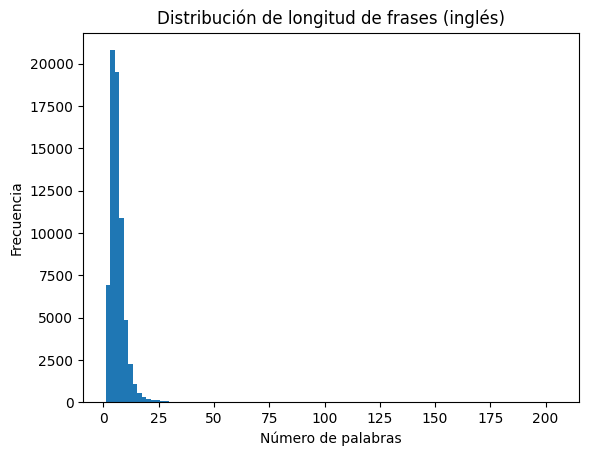

In [7]:
#############################################
# SOLUCIÓN                                  #
#############################################
import matplotlib.pyplot as plt
# Visualizamos la longitud de los vectores del idioma origen

# Distribución de longitudes de texto
def words_counter(text):
    if type(text) != float:
      return len(text.split()) # contar palabras de cada reseña
    else:
      return None

len_eng = [words_counter(text) for text in eng_spa[:,0] if words_counter(text) is not None]
len_spa = [words_counter(text) for text in eng_spa[:,1] if words_counter(text) is not None]

print(round(np.mean(len_eng),2))
print(round(np.mean(len_spa),2))

# # Graficar histograma de longitud de textos:
plt.hist(len_eng,bins=100)
plt.title("Distribución de longitud de frases (inglés)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

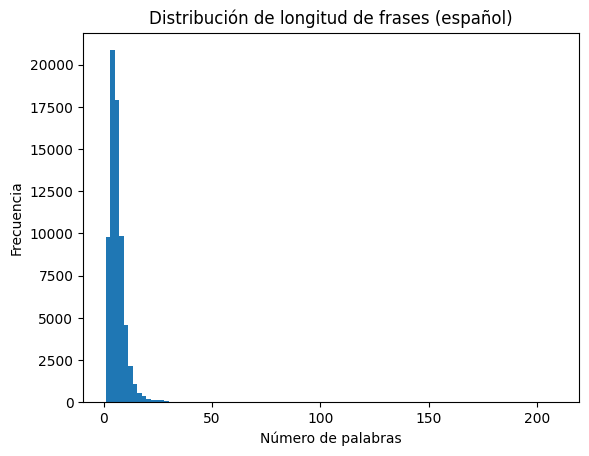

In [7]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Visualizamos la longitud de los vectores del idioma destino
plt.hist(len_spa,bins=100)
plt.title("Distribución de longitud de frases (español)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

Para la definición de los modelos, necesitamos instalar *keras* y *tensorflow*.

In [8]:
!pip install keras

In [9]:
!pip install tensorflow

**d. Calcular el vocabulario tanto en el idioma origen , como en el idioma destino, e imprimir su tamaño**.

*Resultado esperado:* Se visualizarán dos números. Cada número representa el tamaño del vocabulario de las frases del idioma origen y del destino, respectivamente, después de haber aplicado el preprocesamiento y tokenización.

In [10]:
#############################################
# SOLUCIÓN                                  #
#############################################

vocab_eng = [word for sentence in eng_spa[:,0] for word in sentence.split()]
vocab_spa = [word for sentence in eng_spa[:,1] for word in sentence.split()]

vocab_size_eng = len(set(vocab_eng))
vocab_size_spa = len(set(vocab_spa))

print(f"Tamaño idioma origen (eng): {vocab_size_eng}")
print(f"Tamaño idioma destino (spa): {vocab_size_spa}")

Tamaño idioma origen (eng): 17312
Tamaño idioma destino (spa): 28257


**e. Separamos los conjuntos de entrenamiento por idioma y los codificamos.**

En este paso, se separarán los datos en dos conjuntos: uno para entrenamiento (llamado *train*) y otro para prueba (llamado *test*), utilizando una división del 80% para entrenamiento y 20% para prueba.


*Salida esperada:* tres primeras filas del dataset de entrenamiento *train*.


In [11]:
#############################################
# SOLUCIÓN                                  #
#############################################

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

train, test = train_test_split(eng_spa, test_size=0.2, random_state = 12)
train[:3]

array([["there's too much sugar in the coffee ",
        'el café tiene demasiado azúcar '],
       ["tom hasn't heard from mary since last june ",
        'tom no ha oído de mary desde junio pasado '],
       ['i was sure i had never seen her before ',
        'yo estaba seguro de no haberla visto antes ']], dtype='<U1246')

**f. Definir y aplicar una función para codificar las secuencias**

En este paso, los dos conjuntos de datos creados en el punto anterior,  serán codificados usando **tokenización** y un proceso de **padding** para asegurar que todas las secuencias, de un mismo idioma, tienen la misma longitud.

**Importante:** Para llevar a cabo un primer experimento, *dependiendo de la capacidad de procesamiento disponible para cada uno*, se sugiere ajustar el valor del parámetro **longitud de secuencia**, *hasta encontrar el valor más alto posible que, permita entrenar el modelo encoder-decoder, en un tiempo aceptable.*

El parámetro **longitud de secuencia** tiene un impacto importante en el entrenamiento del modelo. Un valor alto permite al modelo capturar más contexto en las frases, lo cual es crucial para traducir correctamente oraciones complejas; sin embargo, si la longitud es demasiado corta, el modelo puede truncar frases importantes, perdiendo información clave. Uso de memoria y eficiencia computacional:

Además, longitudes mayores requieren más memoria, ya que el modelo debe manejar matrices más grandes para representar las secuencias. Mientras que, longitudes cortas son más eficientes en términos de recursos, pero pueden sacrificar precisión si las oraciones reales exceden ese límite con frecuencia.

Finalmente, en traducción automática, las longitudes de las secuencias en el idioma origen y destino no siempre deben ser iguales (por ejemplo, una oración en inglés puede ser más corta que su equivalente en alemán).

Considerando lo anterior, si se dispone de infraestructura con GPU, se sugiere iniciar con un valor máximo de 12 (o cercano) y mínimo de 4. En la celda de código que sigue, se propone iniciar con el valor intermedio de 8, pero este valor puede ser ajustado.

Si durante el entrenamiento, se presentan problemas (por limitación de infraestructura), se podría volver a este paso para fijar el valor mínimo de 4 para la longitud de secuencia de ambos idiomas, aunque, los resultados de la traducción serían pobres.


**Salida esperada:** Tamaño de cada dataset y muestra de las tres primeras secuencias codificadas del dataset de entrenamiento.

In [12]:
# ----------------------
# Dependiendo de la infraestructura del sistema,
# la longitud de sencuencia se puede iniciar con un valor de 8.
max_text_length = 8
# ----------------------

# Representación numérica de las palabras (tokenización)
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer


# Tokenización de las frases en inglés y en castellano
#Tokenizar las frases en inglés
eng_tokenizer = tokenization(eng_spa[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

#Tokenizar las frases en castellano
spa_tokenizer = tokenization(eng_spa[:, 1])
spa_vocab_size = len(spa_tokenizer.word_index) + 1


from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_sequences(tokenizer, length, lines):
    # Codificar las secuencias con los índices de las palabras
    seq = tokenizer.texts_to_sequences(lines)
    # Hacer el padding
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

trainX = encode_sequences(spa_tokenizer, max_text_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, max_text_length, train[:, 0])

testX = encode_sequences(spa_tokenizer, max_text_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, max_text_length, test[:, 0])


print(trainX.shape, testX.shape)
trainX[:3]


(54402, 8) (13601, 8)


array([[   6,  280,   35,  120,  882,    0,    0,    0],
       [   4,   55,  522,    1,   31,  203, 2110,  201],
       [  32,   48,  235,    1,    4, 5328,  237,  113]], dtype=int32)

### 1.1.2 Definición del modelo encoder-decoder y entrenamiento (2 puntos)

**a. Definimos el modelo *encoder-decoder* basándonos en el notebook visto en la asignatura**, y lo instanciamos con una capa de embedding para las frases de la **lengua origen** y la dimensión de la última capa como el vocabulario de la **lengua destino**.

**Importante:** Para la definición del modelo, considerar los siguientes parámetros y valores referenciales:

* Como cantidad de **units** trabajar, inicialmente, con el valor de 100. El número de unidades o celdas de memoria en cada capa LSTM define la dimensionalidad del espacio interno en el que la LSTM procesa y representa la información a lo largo del tiempo; es decir, es el tamaño del vector de estado oculto *hidden state* y del estado de celda *cell state* que la LSTM mantiene para capturar patrones y dependencias en las secuencias de entrada.

 A mayor número de units, aumenta la capacidad del modelo para modelar relaciones complejas y dependencias a largo plazo en el texto, lo cual es clave en traducción automática donde el contexto puede abarcar varias palabras o frases. Sin embargo, un valor alto incrementa el número de parámetros, por tanto, se requerirá más memoria y tiempo de cómputo; además, crece el riesgo de sobreajuste si los datos de entrenamiento no son suficientes.

 Por lo indicado, trabajaremos con un valor inicial de 100, aunque, lo ideal sería usar un valor superior.

* Longitud de los vectores de embeddings *embedding_vec_length* establecer en 200; este es un valor referencial que podría ser ajustado según el tamaño del vocabulario, la complejidad del idioma y los recursos disponibles. Más adelante, en el *ejercicio 1.1.3* se pedirá jugar un poco con este valor.

**Resultado esperado:** se habrá instanciado un modelo encoder-decoder. Este modelo está diseñado para procesar y traducir textos del **idioma origen** al **idioma destino** utilizando capas de embedding y LSTM.

*Salida esperada*: Utilizar el método *mt_model.summary()* para visualizar la estructura y configuración del modelo, incluyendo el número de parámetros y la disposición de las capas.

In [21]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Definimos el modelo encoder-decoder

embedding_vec_length = 200 # Valor referencial
units = 100 # Valor referencial


from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

def define_model(in_vocab_size, embedding_vec_length, max_text_length, out_timesteps, out_vocab_size):
    # Encoder
    mt_model = Sequential()
    mt_model.add(Embedding(in_vocab_size, embedding_vec_length, input_length = max_text_length, mask_zero=True))
    mt_model.add(LSTM(units))

    # Decoder
    mt_model.add(RepeatVector(out_timesteps))
    mt_model.add(LSTM(units, return_sequences=True))
    mt_model.add(Dense(out_vocab_size, activation='softmax'))
    
    return mt_model

#Definimos el modelo con una capa de embedding para las frases de la lengua origen (inglés)
mt_model = define_model(eng_vocab_size, embedding_vec_length, max_text_length, max_text_length, spa_vocab_size)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**b. Compilamos el modelo**

**Resultado esperado:** el modelo estará compilado y listo para ser entrenado. Se tiene que utilizar el optimizador *RMSprop* con una tasa de aprendizaje de *0.001* y la función de pérdida *sparse_categorical_crossentropy*.

In [22]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Compilamos el modelo
from keras import optimizers

rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
mt_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**c. Entrenamos y guardamos el modelo.**

**Importante:** El modelo puede tardar horas si se hace en CPU, y requerirá mucho menos si existen GPUs disponibles. Colab permite el uso de GPU en general, si no se hace un uso extensivo, y se va deshabilitando la opción y habilitando segun necesidades. Si se tiene activada siempre penaliza y la desactiva.

* Por tanto, para probar si funciona, recomendamos lanzar el entrenamiento **solo con una época** y ver que funciona. Una vez tenemos claro que el flujo está funcionando, subimos el valor (por ejemplo, 50 o 100, dependiendo cómo evoluciona el modelo con cada *epoch*).

* Si, durante el entrenamiento, Colab no puede cargar el modelo en memoria, recomendamos bajar el valor de **longitud de palabra** a 4 y el número de **units** a 128, de esta manera podríamos completar el proceso, aunque, seguramente, los resultados no serán buenos.

* Revisar el `Notebook de Ejemplo`, en el que se proporcionan pautas y guías para llevar un mejor control de las ejecuciones cuando ocurren reinicios de sesión o saturación de memoria.

In [23]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Entrenamos y guardamos el modelo

from keras.callbacks import ModelCheckpoint

filename = 'model_ta_eng_spa.keras'

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

mt_model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=256, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 8.1732
Epoch 1: val_loss improved from inf to 5.65771, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 25s 121ms/step - loss: 8.1563 - val_loss: 5.6577
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 5.5883
Epoch 2: val_loss improved from 5.65771 to 5.56077, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - loss: 5.5881 - val_loss: 5.5608
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 5.5146
Epoch 3: val_loss improved from 5.56077 to 5.50866, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - loss: 5.5145 - val_loss: 5.5087
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 5.4621
Epoch 4: val_loss improved from 5.50866 to 5.49027, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - loss: 5.4619 - val_loss: 5.4903
Epoch 5/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/ste

**d. Generar predicciones.**

Una vez entrenado el modelo, aplicar el método *predict()* al conjunto de test para obtener las prediciones.

**Sugerencia:**

- Revisar el `Notebook de Ejemplo`, en el que proporciona una pauta para trabajar con un subconjunto del dataset de test, en caso de tener limitaciones durante el procesamiento.

In [24]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Aplicamos el modelo
import os
import numpy as np
from keras.models import load_model

reducir_test = True   # poner True para quedarnos con solo las primeras 100 oraciones
if reducir_test:
    testX_to_pred = testX[:100]
else:
    testX_to_pred = testX

model = load_model(model_path, compile=False)
probs = model.predict(testX_to_pred, batch_size=64, verbose=1)
preds = np.argmax(probs, axis=-1)

print("Preds shape:", preds.shape)
print(preds[:2])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step
Preds shape: (100, 8)
[[7 6 1 1 0 0 0 0]
 [2 6 1 1 0 0 0 0]]


**e. Visualización de resultados.**

Visualizamos los resultados de las predicciones con los valores esperados.

**Resultado esperado:** predicciones traducidas de las primeras 10 entradas del conjunto de prueba. Estas predicciones serán mostradas junto a los textos esperados para comparar.


In [26]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Visualizamos resultados
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

preds_text = []

for i in preds:
    temp = []
    for j in range(len(i)):
        #Obtener la palabra que corresponde al índice del vocabulario de la lengua destino
        t = get_word(i[j], spa_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], spa_tokenizer)) or (t == None):
                     temp.append('')
            else:
                     temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

import pandas as pd

pred_df = pd.DataFrame({'actual' : test[:100,0], 'predicted' : preds_text})

pred_df.sample(10)

,actual,predicted
30,there's a hole in this bucket,de el de
69,where is the city hall,en el de
6,tom is no angel,en el a de
7,everyone quits smoking sooner or later,de
46,he almost never went there,la el a
93,this is all you have to do now,la no que no
38,many english words are derived from latin,de
73,i don't believe in magic,en no que de
82,have you ever seen a blind man swim he probab...,la no que
98,we started playing the game,la el a de


In [28]:
y_test = testY.reshape(testY.shape[0], testY.shape[1], 1)

loss = mt_model.evaluate(
    x=testX,         # shape (n_samples, max_text_length)
    y=y_test,        # shape (n_samples, max_text_length, 1)
    batch_size=256,
    verbose=1
)

print("Test loss:", loss)

213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4.8832
Test loss: 4.876737594604492


f. **Pregunta de análisis:** Según los resultados obtenidos en la predicción (valores reales vs. valores generados), ¿Por qué creéis que no son buenos, y como creéis que podrían obtenerse mejores resultados?

**Respuesta a la pregunta**
-







Porque tanto loss como val_loss que obtenemos son muy altos. El modelo solo llega a "aprender" las palabras más habituales. Si las pérdidas no fuesen tan altas podríamos aumentar units, entrenar el modelo durante más épocas, modificar LR, longitud de secuencia, de embeddings, etc.
Pero en este caso, tendría más impacto crear un modelo más completo, usando capas LSTM más grande, añadiendo más capas y mecanismos de atención o directamente transformers.

### 1.1.3 Experimentación con diferentes resultados (1,5 puntos)


En este apartado, podríamos analizar cómo afecta a la calidad de la traducción, la variación de distintos parámetros del modelo, como longitud de embeddings (*embedding_vec_length*), longitud de secuencia (*max_text_length*), número de units (*units*), batch size, epochs etc. Sin embargo, debido a que no siempre encontraremos GPUs libres, aquí vamos vamos a limitarnos a experimentar con los parámetros ** *embedding_vec_length* y *max_text_length*.

**Importante:** durante las ejecuciones, dependiendo del modelo y del consumo de memoria actual, la predicción se puede cancelar por agotar toda la memoria disponible. En caso de cancelación, recargar el modelo desde local (ver apartado 1.1.2.2 del `Notebook de Ejemplo`) y predecir solo para un subconjunto del fichero de test (aunque en este caso no serán válidas las magnitudes de medición de calidad del sistema).  


Además, se sugiere que tras cada entrenamiento, se realice una copia del modelo entrenado y se almacene en local *'model/..'* para, en caso de cancelación, no tener que realizar de nuevo el correspondiente entrenamiento, asociando a la copia los parámetros con los que se entrenó.


**a. Experimentar con el valor de longitud de embedding** (*embedding_vec_length*)

Analizar cómo un incremento/reducción en el tamaño de los vectores de embedding afecta el rendimiento de un modelo de traducción automática del **idioma origen** al **idioma destino**.

**Resultado esperado:** Se imprimirá el resultado que muestre el rendimiento del modelo creado para diferentes tamaños de embedding (inicialmente, se sugirió trabajar con 200; ahora, se podría experimentar con valores como 50 y 300). Cada resultado constará del tamaño del embedding seguido de un *score*, que indique la efectividad del modelo calculado con *model.evaluate()*


In [29]:
# Posibles tamaños de vectores a probar:
embedding_sizes = [50, 300]
epochs = 30 # incrementar este valor si existe disponibilidad de GPUs.
batch_size=128

#############################################
# SOLUCIÓN                                  #
#############################################

embedding_vec_length = 50

def define_model(in_vocab_size, embedding_vec_length, max_text_length, out_timesteps, out_vocab_size):
    # Encoder
    mt_model = Sequential()
    mt_model.add(Embedding(in_vocab_size, embedding_vec_length, input_length = max_text_length, mask_zero=True))
    mt_model.add(LSTM(units))

    # Decoder
    mt_model.add(RepeatVector(out_timesteps))
    mt_model.add(LSTM(units, return_sequences=True))
    mt_model.add(Dense(out_vocab_size, activation='softmax'))
    
    return mt_model

#Definimos el modelo con una capa de embedding para las frases de la lengua origen (inglés)
mt_model = define_model(eng_vocab_size, embedding_vec_length, max_text_length, max_text_length, spa_vocab_size)

# Compilar
rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

# Entrenar
filename = 'model_ta_eng_spa.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
mt_model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=256, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 8.1687
Epoch 1: val_loss improved from inf to 5.64790, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - loss: 8.1519 - val_loss: 5.6479
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 5.5930
Epoch 2: val_loss improved from 5.64790 to 5.59436, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - loss: 5.5927 - val_loss: 5.5944
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 5.5008
Epoch 3: val_loss improved from 5.59436 to 5.50498, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - loss: 5.5007 - val_loss: 5.5050
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 5.4576
Epoch 4: val_loss improved from 5.50498 to 5.47147, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - loss: 5.4575 - val_loss: 5.4715
Epoch 5/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/ste

In [30]:
y_test = testY.reshape(testY.shape[0], testY.shape[1], 1)

# 2) Llama a evaluate sobre X e Y:
loss = mt_model.evaluate(
    x=testX,         # shape (n_samples, max_text_length)
    y=y_test,        # shape (n_samples, max_text_length, 1)
    batch_size=256,
    verbose=1
)

print("Tamaño del embedding: 50")
print("Test loss:", loss)

54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.8027
Tamaño del embedding: 50
Test loss: 4.793683052062988


Longitud de embedding: 300

In [31]:
embedding_vec_length = 300

def define_model(in_vocab_size, embedding_vec_length, max_text_length, out_timesteps, out_vocab_size):
    # Encoder
    mt_model = Sequential()
    mt_model.add(Embedding(in_vocab_size, embedding_vec_length, input_length = max_text_length, mask_zero=True))
    mt_model.add(LSTM(units))

    # Decoder
    mt_model.add(RepeatVector(out_timesteps))
    mt_model.add(LSTM(units, return_sequences=True))
    mt_model.add(Dense(out_vocab_size, activation='softmax'))
    
    return mt_model

#Definimos el modelo con una capa de embedding para las frases de la lengua origen (inglés)
mt_model = define_model(eng_vocab_size, embedding_vec_length, max_text_length, max_text_length, spa_vocab_size)

# Compilar
rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

# Entrenar
filename = 'model_ta_eng_spa.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
mt_model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=256, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

y_test = testY.reshape(testY.shape[0], testY.shape[1], 1)

loss = mt_model.evaluate(
    x=testX,
    y=y_test,
    batch_size=256,
    verbose=1
)

print("Tamaño del embedding: 300")
print("Test loss:", loss)

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 8.1532
Epoch 1: val_loss improved from inf to 5.64166, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - loss: 8.1364 - val_loss: 5.6417
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 5.5978
Epoch 2: val_loss improved from 5.64166 to 5.55828, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - loss: 5.5975 - val_loss: 5.5583
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 5.5206
Epoch 3: val_loss improved from 5.55828 to 5.52982, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - loss: 5.5204 - val_loss: 5.5298
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 5.4690
Epoch 4: val_loss improved from 5.52982 to 5.49657, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - loss: 5.4689 - val_loss: 5.4966
Epoch 5/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/ste

**b. Ejercicio opcional: Experimentar con el valor longitud de secuencia** (*max_text_length*).

Analizar cómo un incremento/reducción de la longitud de secuencia impacta a la calidad del modelo de traducción.

**Resultado esperado:** Se imprimirá el resultado que muestre el rendimiento del modelo para una longitud de secuencia superior o inferior al establecido (por ejemplo, si se inicializó el modelo preliminar con el valor de 8, aquí se podría probar con 4 y 12). El resultado constará del valor de la longitud, y del score que indica la efectividad del modelo calculado con *model.evaluate()*

max_text_length = 4

In [33]:
#############################################
# SOLUCIÓN                                  #
#############################################
max_text_length = 4

embedding_vec_length = 200


#Definimos el modelo con una capa de embedding para las frases de la lengua origen (inglés)
mt_model = define_model(eng_vocab_size, embedding_vec_length, max_text_length, max_text_length, spa_vocab_size)

# Compilar
rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

trainY_cut = trainY[:, :max_text_length]
testY_cut  = testY[:,  :max_text_length]

y_train = trainY_cut.reshape(-1, max_text_length, 1)
y_test  = testY_cut.reshape(-1,  max_text_length, 1)

# Entrenar
filename = 'model_ta_eng_spa.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
mt_model.fit(trainX, y_train,
                    epochs=30, batch_size=256, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

# y_test = testY.reshape(testY.shape[0], testY.shape[1], 1)

loss = mt_model.evaluate(
    x=testX,         # shape (n_samples, max_text_length)
    y=y_test,        # shape (n_samples, max_text_length, 1)
    batch_size=256,
    verbose=1
)

print("Tamaño del embedding: 200")
print("max_text_length: 4")
print("Test loss:", loss)

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.2716
Epoch 1: val_loss improved from inf to 6.59261, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 9.2569 - val_loss: 6.5926
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 6.5390
Epoch 2: val_loss improved from 6.59261 to 6.47158, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - loss: 6.5386 - val_loss: 6.4716
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 6.4202
Epoch 3: val_loss improved from 6.47158 to 6.38748, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - loss: 6.4200 - val_loss: 6.3875
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 6.3421
Epoch 4: val_loss improved from 6.38748 to 6.34228, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - loss: 6.3420 - val_loss: 6.3423
Epoch 5/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss:

max_text_length = 12

In [38]:
#############################################
# SOLUCIÓN                                  #
#############################################
max_text_length = 12

embedding_vec_length = 200

trainX = pad_sequences(trainX, maxlen=max_text_length, padding='post')
trainY = pad_sequences(trainY, maxlen=max_text_length, padding='post')
testX  = pad_sequences(testX,  maxlen=max_text_length, padding='post')
testY  = pad_sequences(testY,  maxlen=max_text_length, padding='post')

#Definimos el modelo con una capa de embedding para las frases de la lengua origen (inglés)
mt_model = define_model(eng_vocab_size, embedding_vec_length, max_text_length, max_text_length, spa_vocab_size)

# Compilar
rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

trainY_cut = trainY[:, :max_text_length]
testY_cut  = testY[:,  :max_text_length]

y_train = trainY_cut.reshape(-1, max_text_length, 1)
y_test  = testY_cut.reshape(-1,  max_text_length, 1)

# Entrenar
filename = 'model_ta_eng_spa.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
mt_model.fit(trainX, y_train,
                    epochs=30, batch_size=256, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

# y_test = testY.reshape(testY.shape[0], testY.shape[1], 1)

loss = mt_model.evaluate(
    x=testX,         # shape (n_samples, max_text_length)
    y=y_test,        # shape (n_samples, max_text_length, 1)
    batch_size=256,
    verbose=1
)

print("Tamaño del embedding: 200")
print("max_text_length: 12")
print("Test loss:", loss)

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 7.0449
Epoch 1: val_loss improved from inf to 4.05409, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - loss: 7.0243 - val_loss: 4.0541
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 4.0175
Epoch 2: val_loss improved from 4.05409 to 3.99299, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - loss: 4.0171 - val_loss: 3.9930
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 3.8816
Epoch 3: val_loss improved from 3.99299 to 3.72551, saving model to model_ta_eng_spa.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - loss: 3.8810 - val_loss: 3.7255
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 3.6635
Epoch 4: val_loss did not improve from 3.72551
171/171 ━━━━━━━━━━━━━━━━━━━━ 28s 163ms/step - loss: 3.6631 - val_loss: 3.7687
Epoch 5/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 3.5506
Epoch 5: val_loss improved 

Según los resultados obtenidos en este ejercicio 1.1.3, discutir en el *documento de Análisis* las diferencias encontradas.

## 1.2 TA con Embeddings preentrenados (2,5 puntos)

En este apartado repetiremos el ejercicio anterior cargando a la capa de embedding los pesos d'un modelo GloVe entrenado para el inglés.

Este apartado 1.2 puede ejecutarse en diferentes sesiones de trabajo y no depende de las secciones anteriores a excepción de:
* Ejecutar el apartado *0. Conexión con Drive* (o las celdas que se hayan definido para otros entornos no Colab).
* Ejecutar las celda de preparación de datos (sección 1.1.1)
* Ejecutar las celdas, cuando sea necesario, del apartado *1.1.2.2 Cargar desde checkpoint y continuar entrenamiento* e invocar las correspondientes funciones con el path del modelo guardado en local correspondiente a este apartado sobre Embeddings preentrenados.

### 1.2.1 Carga de GloVe

**a. Empezamos cargando el modelo GloVe para el inglés.**

Podéis usar 'glove.42B.300d.txt'.(https://www.kaggle.com/datasets/yutanakamura/glove42b300dtxt)

**Salida esperada:** tamaño del objeto cargado, usar *len()*.

In [ ]:
import numpy as np

embeddings_index = {}

glove="glove.42B.300d.txt"
glove_path = f"/kaggle/input/glove42b300dtxt/glove.42B.300d.txt"    #'my_path_pra2' definida en sección 0


print(f"Attempting to open glove file: {glove_path}")
try:
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        print(f"Successfully opened glove file: {glove}")
except Exception as e:
    print(f"ERROR: File not found at opening file: {e}")

file_path = f"/kaggle/input/data-eng-spa/data_eng_spa.tsv"
eng_spa = pd.read_csv(file_path, sep="\t", header=None, usecols=[1, 3])

print(len(embeddings_index))


### 1.2.2 Definición del modelo

**a. Construir la matriz de embeddings.**
  
A continuación, tenemos que construir la matriz de embeddings. Para no cargar todo el vocabulario del modelo, podemos filtrar solo aquellas entradas presentes en el vocabulario del tokenizador que usaremos. Además, debemos de incluir en la matriz de vectores correspondientes los índices de las entradas (palabras) que no encontremos en el modelo glove cargado. Estos vectores se suelen inicializar con 0s o con el resultado de una distribución N (0,1).

**Salida esperada:** imprimir los 3 primeros elementos de la matriz de embeddings.

In [2]:
#############################################
# SOLUCIÓN                                  #
#############################################
embedding_vec_length = 200
eng_sentences = eng_spa.iloc[:, 0].values
eng_tokenizer = tokenization(eng_sentences)
eng_vocab_size = len(eng_tokenizer.word_index) + 1

embedding_matrix = np.zeros((eng_vocab_size, embedding_vec_length))
for word, idx in eng_tokenizer.word_index.items():
    vector = embeddings_index.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector
    else:
        # OOV: inicializa con valores de N(0,1)
        embedding_matrix[idx] = np.random.normal(size=(embedding_vec_length,))

print("Primeras 3 filas de la matriz de embeddings:")
print(embedding_matrix[:3])

NameError: name 'eng_spa' is not defined

**b. Inicializar la capa de embeddings.**

Para inicializar una capa de embeddings con pesos predefinidos se utiliza el argumento `weights`. Además, como no queremos que se modifiquen los pesos, marcamos el argumento `trainable` como `False`.

Siguiendo con nuestro ejemplo, haríamos:

In [48]:
from keras.layers import Embedding

# Se podría experimentar con diferentes modelos, variando parámetros como 'embedding_vec_length' y 'max_text_length'
# Al entrenar nuevos modelos, recordar:
# - O bien modificar el nombre del modelo en el parámetro callback (variable 'model_path') de la clase 'fit'
# - O bien (opción preferida), una vez finaliza el entrenamiento, renombrar el modelo almacenado según 'model_path'.

embedding_vec_length = 300
max_text_length = 8

#############################################
# SOLUCIÓN                                  #
#############################################
embedding_layer = Embedding(len(eng_tokenizer.word_index) + 1,
                            embedding_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_length,
                            trainable=False,
                            mask_zero=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**c. Definición del nuevo modelo considerando los pesos del modelo preentrenado.**

 Implementa y entrena de nuevo un modelo de traducción automática del **idioma origen** al **idioma destino**, esta vez, cargando los pesos de la capa embedding a partir del modelo Glove preentrenado en inglés y disponible en `glove.42B.300d.txt`.


In [53]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, Dense
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import numpy as np

# Parámetros
max_text_length      = 12
embedding_vec_length = 300
units                = 256
eng_vocab_size       = len(eng_tokenizer.word_index) + 1
spa_vocab_size       = len(spa_tokenizer.word_index) + 1

# RECORTAMOS trainY y testY a max_text_length pasos y los reshapeamos
trainY_cut = trainY[:, :max_text_length]
testY_cut  = testY[:,  :max_text_length]

y_train = trainY_cut.reshape(-1, max_text_length, 1)
y_test  = testY_cut.reshape(-1,  max_text_length, 1)

# Definimos el modelo
mt_model = Sequential()
mt_model.add(Embedding(
    input_dim    = eng_vocab_size,
    output_dim   = embedding_vec_length,
    input_length = max_text_length,
    weights      = [embedding_matrix],  # pesos GloVe preentrenados
    trainable    = False,
    mask_zero    = True
))
mt_model.add(LSTM(units))
mt_model.add(RepeatVector(max_text_length))
mt_model.add(LSTM(units, return_sequences=True))
mt_model.add(Dense(spa_vocab_size, activation='softmax'))

# Compilamos
rms = optimizers.RMSprop(learning_rate=0.001)
mt_model.compile(
    optimizer = rms,
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

### 1.2.3 Entrenamiento del modelo

**Entrenar y guardar el modelo.**

Aunque este entrenamiento es quizá un "poco" más liviano que el anterior, recomendamos el uso de GPU si es viable.

**Sugerencias:**

- Probar con diferentes valores en *batch_size*. En el notebook de ejemplo se trabajó bien con el valor de 128.

- Observar cómo evoluciona el modelo conforme se ejecuta cada *epoch*; en caso de no observar mejoras, se puede bajar su valor. En el notebook de ejemplo, se bajó el valor a 50 porque a partir de la *epoch* 32 no se notaron diferencias.

- Revisar el `Notebook de Ejemplo`, subsección 1.2.3.2, en el que proporcionan pautas y guías para llevar un mejor control de las ejecuciones cuando ocurren reinicios de sesión o saturación de memoria.

In [54]:
#############################################
# SOLUCIÓN                                  #
#############################################

# entrenamos y guardamos el modelo

# Callback de checkpoint
checkpoint = ModelCheckpoint(
    'model_ta_eng_spa_glove.keras',
    monitor        = 'val_loss',
    save_best_only = True,
    mode           = 'min',
    verbose        = 1
)

# Entrenamos
history = mt_model.fit(
    trainX,
    y_train,
    epochs           = 30,
    batch_size       = 256,
    validation_split = 0.2,
    callbacks        = [checkpoint],
    verbose          = 1
)

# Evaluamos
loss, acc = mt_model.evaluate(
    testX,
    y_test,
    batch_size = 256,
    verbose    = 1
)
print(f"loss: {loss:.4f}")
print(f"accuracy: {acc:.4f}")

Epoch 1/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.2443 - loss: 6.7331
Epoch 1: val_loss improved from inf to 5.65556, saving model to model_ta_eng_spa_glove.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 60s 332ms/step - accuracy: 0.2444 - loss: 6.7236 - val_accuracy: 0.2528 - val_loss: 5.6556
Epoch 2/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.2565 - loss: 5.4352
Epoch 2: val_loss improved from 5.65556 to 5.47389, saving model to model_ta_eng_spa_glove.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 54s 319ms/step - accuracy: 0.2566 - loss: 5.4346 - val_accuracy: 0.2719 - val_loss: 5.4739
Epoch 3/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2706 - loss: 5.2550
Epoch 3: val_loss improved from 5.47389 to 5.18651, saving model to model_ta_eng_spa_glove.keras
171/171 ━━━━━━━━━━━━━━━━━━━━ 55s 323ms/step - accuracy: 0.2706 - loss: 5.2546 - val_accuracy: 0.2710 - val_loss: 5.1865
Epoch 4/30
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.2749 - loss: 5.1630
E

### 1.2.4 Generación de predicciones

En este paso, aplicar el modelo para generar las predicciones utilizando el dataset de test.

**Resultado esperado:**

- Visualizar tabla de resultados: frase en idioma origen, texto traducido real vs. texto traducido generado.

**Sugerencia:** Si durante la ejecución, se cancela la predicción por agotar toda la memoria disponible, recargar el modelo desde local (ver apartado 1.2.3.2 del `Notebook de Ejemplo`) y predecir solo para un subconjunto del fichero de test (aunque en este caso no serán validas las magnitudes de medición de calidad del sistema).   

In [55]:
# Aplicamos el modelo y visualizamos resultados

# Si debido a la configuración elegida, no se puede realizar la predicción por problemas de memoria
# con todo el fichero de testX, utilizar un subconjunto del mismo
reducir_test = True # Colocar True para elegir las primeras 100 filas.
if reducir_test:
    testX_to_pred = testX[:100]
else:
    testX_to_pred = testX


#############################################
# SOLUCIÓN                                  #
#############################################

model_path = 'model_ta_eng_spa_glove.keras'

model = load_model(model_path, compile=False)
probs = model.predict(testX_to_pred, batch_size=256, verbose=1)
preds = np.argmax(probs, axis=-1)

print("Preds shape:", preds.shape)
print(preds[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Preds shape: (100, 8)
[[ 1  6  6  6  6  0  0  0]
 [23 14  8  0  0  0  0  0]]


In [56]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Visualizamos resultados
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

preds_text = []

for i in preds:
    temp = []
    for j in range(len(i)):
        #Obtener la palabra que corresponde al índice del vocabulario de la lengua destino
        t = get_word(i[j], spa_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], spa_tokenizer)) or (t == None):
                     temp.append('')
            else:
                     temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

import pandas as pd

pred_df = pd.DataFrame({'actual' : test[:100,0], 'predicted' : preds_text})

pred_df.sample(10)

,actual,predicted
52,do you remember us,él no es
62,let's drink to his success,la los que de
75,we should follow them,no
1,she called him a liar,las los es
0,tom's wife's pregnant,de el
32,he hasn't cleaned her room yet,un padre a es
89,put it onto the table,la es de
20,it is no use asking me for money,en el que
11,rest in peace,la no que es
78,tom doesn't know the difference between viking...,de mi
